In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [61]:
with open('data\\IndicedeCalidad\\data_PM2.5.pkl', 'rb') as f:
    data = pkl.load(f)
    

In [62]:
data.query('Estación == "NL, Universidad"')

,Fecha_Dia,Estación,Parametro,Latitud,Longitud,Concentración por día,id,Calidad del aire,Riesgo
1662,2023-01-02,"NL, Universidad",PM2.5,25.7216,-100.3124,26,1.0,Aceptable,Moderado
1663,2023-01-03,"NL, Universidad",PM2.5,25.7216,-100.3124,18,1.0,Aceptable,Moderado
1664,2023-01-04,"NL, Universidad",PM2.5,25.7216,-100.3124,24,1.0,Aceptable,Moderado
1665,2023-01-05,"NL, Universidad",PM2.5,25.7216,-100.3124,22,1.0,Aceptable,Moderado
1666,2023-01-06,"NL, Universidad",PM2.5,25.7216,-100.3124,25,1.0,Aceptable,Moderado
...,...,...,...,...,...,...,...,...,...
2234,2024-12-27,"NL, Universidad",PM2.5,25.7216,-100.3124,27,1.0,Aceptable,Moderado
2235,2024-12-28,"NL, Universidad",PM2.5,25.7216,-100.3124,15,0.0,Buena,Bajo
2236,2024-12-29,"NL, Universidad",PM2.5,25.7216,-100.3124,21,1.0,Aceptable,Moderado
2237,2024-12-30,"NL, Universidad",PM2.5,25.7216,-100.3124,21,1.0,Aceptable,Moderado


In [63]:
pm_NL = data.query('Estación == "NL, Juarez"')

In [64]:
m_pm_NL = pm_NL.groupby(pm_NL['Fecha_Dia'].dt.to_period("M"))['Concentración por día'].mean().reset_index()


In [65]:
m_pm_NL.rename(columns={'Fecha_Dia':'Fecha', 'Concentración por día':'Concentración Promedio Mensual'}, inplace=True)

In [66]:
m_pm_NL['Concentración Promedio Mensual'] = m_pm_NL['Concentración Promedio Mensual'].astype(int)

In [67]:
m_pm_NL

,Fecha,Concentración Promedio Mensual
0,2023-01,20
1,2023-02,23
2,2023-03,28
3,2023-04,26
4,2023-05,26
5,2023-06,27
6,2023-07,16
7,2023-08,16
8,2023-09,12
9,2023-10,18


In [68]:
pemex_NL = pd.DataFrame({'Fecha': pd.date_range(start='2023-01', end='2025-01', freq='M').strftime('%Y-%m'),
                         'Miles de barriles mensuales': [101,	132,	135,	142,	82,	148,	84,	87,	94,	121,	147,	156,
169, 165, 160, 150, 89, 123, 162, 170, 131, 166, 96, 134]})


C:\Users\hgera\AppData\Local\Temp\ipykernel_7200\1684294801.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [69]:
pemex_NL

,Fecha,Miles de barriles mensuales
0,2023-01,101
1,2023-02,132
2,2023-03,135
3,2023-04,142
4,2023-05,82
5,2023-06,148
6,2023-07,84
7,2023-08,87
8,2023-09,94
9,2023-10,121


### Hagamos una prueba de normalidad

In [70]:
import scipy.stats as stats

# Datos
barriles = pemex_NL['Miles de barriles mensuales'].iloc[0:24]
pm25 = m_pm_NL['Concentración Promedio Mensual'].iloc[0:24]

# Prueba de Shapiro-Wilk
shapiro_barriles = stats.shapiro(barriles)
shapiro_pm25 = stats.shapiro(pm25)


# Imprimir resultados
print(f"Prueba de Shapiro-Wilk (Barriles): Estadístico = {shapiro_barriles[0]:.4f}, p-valor = {shapiro_barriles[1]:.4f}")
print(f"Prueba de Shapiro-Wilk (PM2.5): Estadístico = {shapiro_pm25[0]:.4f}, p-valor = {shapiro_pm25[1]:.4f}")



Prueba de Shapiro-Wilk (Barriles): Estadístico = 0.9055, p-valor = 0.0282
Prueba de Shapiro-Wilk (PM2.5): Estadístico = 0.9288, p-valor = 0.0918


##### COMO p_value < 0.05 se acepta la hipotesis nula de que los datos no siguen una distribución normal

c:\Users\hgera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



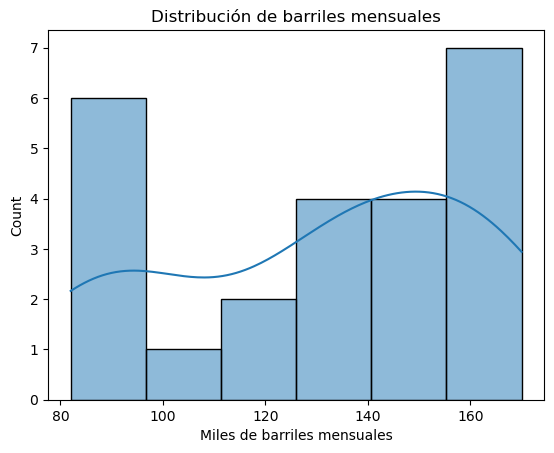

c:\Users\hgera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



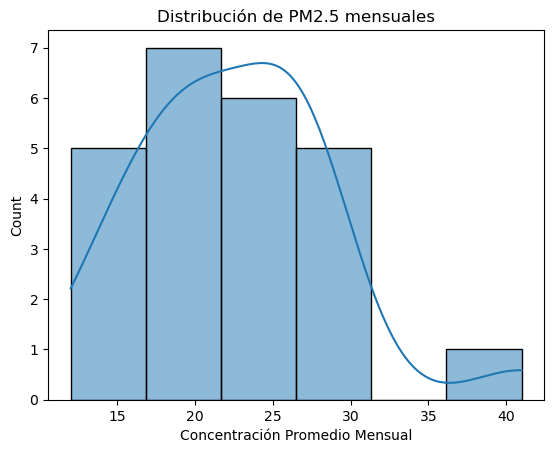

In [71]:
import seaborn as sns
sns.histplot(barriles, kde=True)
plt.title('Distribución de barriles mensuales')
plt.show()
sns.histplot(pm25, kde=True)
plt.title('Distribución de PM2.5 mensuales')
plt.show()

### Veamos con pearson que sale

In [72]:
from scipy.stats import pearsonr, linregress
import plotly.express as px
import pandas as pd
barriles = pemex_NL['Miles de barriles mensuales'].iloc[0:24]
pm25 = m_pm_NL['Concentración Promedio Mensual'].iloc[0:24]

### Normalizar 
# barriles = (barriles - barriles.min()) / (barriles.max() - barriles.min())
# pm25 = (pm25 - pm25.min()) / (pm25.max() - pm25.min())


# Calcular la correlación de Pearson
correlation = pearsonr(barriles, pm25)

# Crear DataFrame
df = pd.DataFrame({'Mes': m_pm_NL['Fecha'].astype(str), 'Barriles': barriles, 'PM2.5': pm25})

# Ajustar la recta de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(barriles, pm25)
print(r_value)
# Crear scatter plot interactivo
fig = px.scatter(df, x='Barriles', y='PM2.5', text='Mes', 
                 title=f'Relación entre Producción de Barriles y Concentración de PM2.5<br>Correlación: {correlation[0]:.2f}', 
                 labels={'Barriles': 'Millones de Barriles', 'PM2.5': 'Concentración PM2.5'})

# Añadir la recta de regresión al gráfico
fig.add_scatter(x=df['Barriles'], y=slope * df['Barriles'] + intercept, mode='lines', name='Recta de Regresión', line=dict(color='blue'))

# Ajustar la posición de las etiquetas
fig.update_traces(textposition='top center', marker=dict(size=10, color='red'),
    textfont=dict(size=8)  # Ajustar tamaño de la fuente de las etiquetas de texto
                  )

# Mostrar la gráfica
fig.show()

# Imprimir la correlación y R²
print(f'Coeficiente de correlación de Pearson: {correlation[0]:.2f}')
print(f'R² (coeficiente de determinación): {correlation[0]**2:.2f}')


0.05166759318694964


Coeficiente de correlación de Pearson: 0.05
R² (coeficiente de determinación): 0.00


In [73]:
from scipy.stats import pearsonr, linregress
import plotly.express as px
import pandas as pd
barriles = pemex_NL['Miles de barriles mensuales'].iloc[6:16]
pm25 = m_pm_NL['Concentración Promedio Mensual'].iloc[6:16]

### Normalizar 
# barriles = (barriles - barriles.min()) / (barriles.max() - barriles.min())
# pm25 = (pm25 - pm25.min()) / (pm25.max() - pm25.min())


# Calcular la correlación de Pearson
correlation = pearsonr(barriles, pm25)

# Crear DataFrame
df = pd.DataFrame({'Mes': m_pm_NL['Fecha'].astype(str), 'Barriles': barriles, 'PM2.5': pm25})

# Ajustar la recta de regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(barriles, pm25)

# Crear scatter plot interactivo
fig = px.scatter(df, x='Barriles', y='PM2.5', text='Mes', 
                 title=f'Relación entre Producción de Barriles y Concentración de PM2.5<br>Correlación: {correlation[0]:.2f}', 
                 labels={'Barriles': 'Millones de Barriles', 'PM2.5': 'Concentración PM2.5'})

# Añadir la recta de regresión al gráfico
fig.add_scatter(x=df['Barriles'], y=slope * df['Barriles'] + intercept, mode='lines', name='Recta de Regresión', line=dict(color='blue'))

# Ajustar la posición de las etiquetas
fig.update_traces(textposition='top center', marker=dict(size=10, color='red'),
    textfont=dict(size=8)  # Ajustar tamaño de la fuente de las etiquetas de texto
                  )

# Mostrar la gráfica
fig.show()

# Imprimir la correlación y R²
print(f'Coeficiente de correlación de Pearson: {correlation[0]:.2f}')
print(f'R² (coeficiente de determinación): {correlation[0]**2:.2f}')
print(f'p-valor: {p_value:.4f}')


Coeficiente de correlación de Pearson: 0.88
R² (coeficiente de determinación): 0.78
p-valor: 0.0007


### Veamos con speamar para datos no normales

In [74]:
from scipy.stats import spearmanr

# Calcular correlación de Spearman
rho, p_value = spearmanr(barriles, pm25)

print(f'Correlación de Spearman: {rho:.2f}, p-valor: {p_value:.3f}')


Correlación de Spearman: 0.76, p-valor: 0.011


### La correlación no es significativa, veamos para el intervalo julio 2023 - ene 2023

In [75]:
from scipy.stats import spearmanr

# Calcular correlación de Spearman
rho, p_value = spearmanr(barriles.iloc[:], pm25.iloc[:])

print(f'Correlación de Spearman: {rho:.2f}, p-valor: {p_value:.3f}')

Correlación de Spearman: 0.76, p-valor: 0.011


### Grafiquemos los barriles y PM25

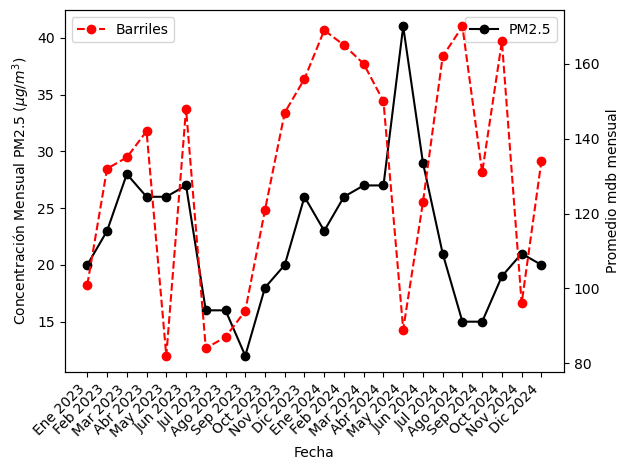

In [79]:
import matplotlib.pyplot as plt

# Datos (que ya has definido)
barriles = pemex_NL['Miles de barriles mensuales'] 
pm25 = m_pm_NL['Concentración Promedio Mensual'] 

meses = ['Ene 2023', 'Feb 2023', 'Mar 2023', 'Abr 2023', 'May 2023', 'Jun 2023', 'Jul 2023', 'Ago 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023',
        'Dic 2023', 'Ene 2024', 'Feb 2024', 'Mar 2024', 'Abr 2024', 'May 2024', 'Jun 2024', 'Jul 2024', 'Ago 2024', 'Sep 2024', 'Oct 2024',
        'Nov 2024', 'Dic 2024']

# Crear figura y ejes
fig, ax1 = plt.subplots()

# Graficar PM2.5 en el primer eje y
ax1.plot(meses, pm25, label='PM2.5', color='black', marker='o')
ax1.set_xlabel('Fecha')
ax1.set_ylabel(r'Concentración Mensual PM2.5 ($\mu g/m^3$)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
plt.legend()
# Crear el segundo eje y
ax2 = ax1.twinx()

# Graficar Barriles en el segundo eje y
ax2.plot(meses, barriles, label='Barriles', color='r', marker='o', linestyle='--')
ax2.set_ylabel('Promedio mdb mensual', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Rotar las etiquetas del eje x
ax1.set_xticks(meses)  # Establecer explícitamente los valores en el eje X
ax1.set_xticklabels(meses, rotation=45, ha='right')  # Rotar las etiquetas a 45 grados y alinearlas a la derecha

# Ajustar el gráfico para evitar que se corten las etiquetas
fig.tight_layout()  # Para ajustar el espacio de la gráfica y evitar superposiciones
plt.legend()
# Mostrar el gráfico
plt.show()
